In [1]:
import numpy as np
import pandas as pd

# Introduction to pandas Data Structures
To get started with pandas, you will need to get comfortable with its two workhorse
data structures: **Series and DataFrame**. While they are not a universal solution for
every problem, they provide a solid, easy-to-use basis for most applications.

# Pandas Series Object

<b>A Series</b> is the primary building block of pandas.

Series represents a `one-dimensional` `labeled indexed array` based on the NumPy ndarray.

Like an array, a Series can hold zero or more values of any single data type

labelelled index array sai muraad hai ke hum apni marzi sai index desakte hain

# Creating Series
A Series can be created and initialized by passing either a <b>scalar value,
a NumPy ndarray, a Python list, or a Python Dict</b> as the data parameter of
the Series constructor. This is the default parameter and does not need to
be specified if it is the first item.

In [3]:
# Create one item series
# 2 is scalar so we have to understand the output 0 is the index of that value 2
s1 = pd.Series(2)
s1

0    2
dtype: int64

In [5]:
# Create a series of multiple items from a list
# ye labelled indexes hain joke default arhe hain series ke andar
s2 = pd.Series([1,2,3,4,5])
s2

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
# Get the values in the series
# agar series mai sai sirf values uthaani hain to values ki property use karenge

s2.values

array([1, 2, 3, 4, 5], dtype=int64)

In [7]:
# Get the index of the series
s2.index

RangeIndex(start=0, stop=5, step=1)

In [9]:
# Explicitly create and index
# index is alpha, not integer
# jab ismain humne labelled indexes diye ismai to mojood ismai dono hote hain, yaani yahan par integer indexing bhi chalegi..
# ..joke position based hai, or labelled indexing bhi chalegi, jo position based indexing hoti hai wo out nhi hoti balke ..
# .. mojoood rehti hain
s3 = pd.Series([1,2,3], index=['a','b','c'])
s3

a    1
b    2
c    3
dtype: int64

In [11]:
# Lookup by label value, not integer position
print(f"value by label 's3['c']' is {s3['c']} and value by index 's3[2]' is {s3[2]}")
# access both by label and index

value by label 's3['c']' is 3 and value by index 's3[2]' is 3


In [13]:
# Create a series from an existing index
# Scalar value will be copied at each index label
s4 = pd.Series(["A","B","C","D","E"], index=s2.index)
s4

0    A
1    B
2    C
3    D
4    E
dtype: object

In [14]:
# Create sereis from dict
# to ismai keys hamare pass labelled indexes bangyi hain
s4 = pd.Series({
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4
})

s4

a    1
b    2
c    3
d    4
dtype: int64

In [15]:
# NumPy array bhi pass karsakte hain

s5 = pd.Series(np.array([22,23,44,55,66]))
s5

0    22
1    23
2    44
3    55
4    66
dtype: int32

<h3>Size, shape, uniqueness, and counts of values</h3>

In [19]:
# Example series, which also contains a NaN means empty value
s= pd.Series([0,1,1,2,3,4,4,5,6,7,np.nan])
s

0     0.0
1     1.0
2     1.0
3     2.0
4     3.0
5     4.0
6     4.0
7     5.0
8     6.0
9     7.0
10    NaN
dtype: float64

In [20]:
print(len(s))
print(s.size)     # number of elements
print(s.shape)
print(s.count())   # count return not null values   >>>> not null values kitni hain
print(s.unique())
print(s.value_counts())   # kosni value kitni dafa hai

11
11
(11,)
10
[ 0.  1.  2.  3.  4.  5.  6.  7. nan]
4.0    2
1.0    2
7.0    1
6.0    1
5.0    1
3.0    1
2.0    1
0.0    1
dtype: int64


<h3>Peeking at data with heads, tails, and take</h3>

In [22]:
# First five (by default)
# jab hamare pass bohot bara data hota hai to hum sirf first 5 rows uthalete hain using head()
s.head()

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [24]:
# First three (we can also specify)

# s.head(3)     >>>>> same as below >>>>>>>
s.head(n = 3)

0    0.0
1    1.0
2    1.0
dtype: float64

In [26]:
# Last five (by default)
s.tail()

6     4.0
7     5.0
8     6.0
9     7.0
10    NaN
dtype: float64

In [27]:
# Last three (we can also specify)

# s.tail(3)    >>>>>>   same as below     >>>>>>>>>>
s.tail(n = 3)

8     6.0
9     7.0
10    NaN
dtype: float64

In [28]:
#The .take() method will return the rows in a series that correspond to the zero-based positions:

# only take specific items      >>>>>    like fancy indexing   >>>>>>>

s.take([9,3,9])

9    7.0
3    2.0
9    7.0
dtype: float64

# Looking up values in Series

In [29]:
# Single item lookup

print(s3)
s3['a']

a    1
b    2
c    3
dtype: int64


1

In [35]:
#Accessing this Series using an integer value will perform a zero-based position lookup of the value:

# lookup by position since the index is not an integer
s3[1]

# jab main apne labelled index provide karunga or wo bhi integer mai karunga to by default indexing wo nhi karega mere labell
# ke accordance hee karega

2

In [36]:
# Multiple items
s3[['c', 'a']]

c    3
a    1
dtype: int64

In [37]:
# Series with an integer index, but not starting with 0
# ab yahan mai ne labelled indexing di hain to kia ye integer based indexing samjh rha hai ya labelled base ?
s5 = pd.Series([1,2,3], index=[2,3,4])
s5

2    1
3    2
4    3
dtype: int64

# label-based lookup versus position-based lookup

In [38]:
s5[2]  # 2 is considered as label based look up
       # coz label also has 2 init

1

In [39]:
s5[0]   # now see in this case we have integer label lookup,position lookup is not working

KeyError: 0

In [40]:
s5.loc[2]  # loc also works on label based look up

1

In [41]:
# integer location lao mai forcefully keh rha hun
s5.iloc[2]  #iLoc forcefully works on position based look up even you dont specify position based index

3

In [42]:
# Multiple items by label (loc)
s5.loc[[4,3]]

4    3
3    2
dtype: int64

In [46]:
s5[[0,2]]

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [47]:
s5.iloc[[0,2]]

2    1
4    3
dtype: int64

In [48]:
s5.iloc[[0,2,3]]   # integer location will throw an exception

IndexError: positional indexers are out-of-bounds

# Alignment via index labels
* alignment ka word jab use karte hain jab 2 cheezon ko barabar karte hain, eik doosre ke saath alignment karte hain

In [49]:
s6 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s6

a    1
b    2
c    3
d    4
dtype: int64

In [50]:
s7 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])
s7

d    4
c    3
b    2
a    1
dtype: int64

In [52]:
# Add them
# Ye apna same label dhoondega add hone keliye numPy ki tarah nhi add hoga lekin agar label naa ho ?
s6 + s7    # it first aligns the data as per label then perfroms operation

a    2
b    4
c    6
d    8
dtype: int64

<h3>-Nan + number = NaN </h3>      (NaN added to a number results in NaN)
    
<h3>-number + NaN = Nan</h3>        (Number added to a Nan results in NaN)

In [53]:
s8 = pd.Series({
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 5
})

s8

a    1
b    2
c    3
d    5
dtype: int64

In [55]:
s9 = pd.Series({
    'b': 6,
    'c': 7,
    'd': 9,
    'e': 10
})

s9

b     6
c     7
d     9
e    10
dtype: int64

Ab yahan a ko a nhi mil rha, b ko b mil gya, c ko c milgya, d ko d mil gya, or e ko e nhi mil rha

* Ab yahan alignment karne keliye wo dono taraf ke labels ko barabar karega yaani pehli series mai a nhi hai to pehle ye a create karega, phir ye aage move karega phir dekhega ke e nhi hai to ye phir e create karega, to dono taraf hojayega abcde, yaani dono lables align hgye, yaani har lablel dono ke pass agya to question ye hai ke isne a align kia hai uski value kia hogi? or secondly usne e align kia hai to e ki value kia hogi ? to ANS is `NaN`, jo labell missing add hoga uski value `NaN` hogi

In [56]:
# NaN's result for a and e
# demonstrates alignment
s8 + s9

a     NaN
b     8.0
c    10.0
d    14.0
e     NaN
dtype: float64

In [57]:
s10 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
s10

a    1.0
a    2.0
b    3.0
dtype: float64

In [58]:
s11 = pd.Series([4.0, 5.0, 6.0], index=['a', 'a', 'c'])
s11

a    4.0
a    5.0
c    6.0
dtype: float64

In [60]:
s10 + s11

a    5.0
a    6.0
a    6.0
a    7.0
b    NaN
c    NaN
dtype: float64

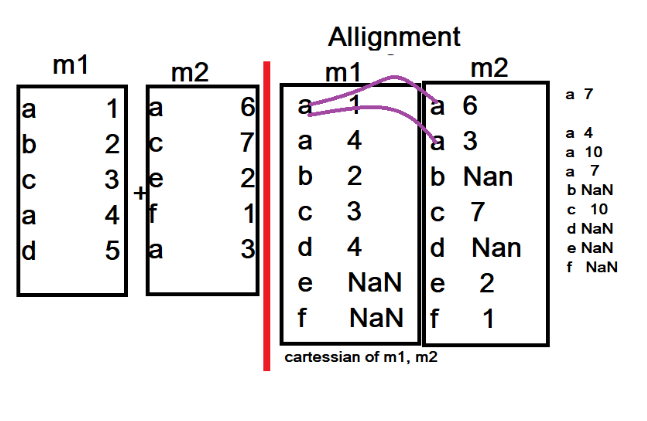

# The Special Case of Not a Number (NaN)

In [61]:
# Mean of numpy array values
nda = np.array([1,2,3,4,5])
nda.mean()

3.0

In [65]:
# Mean of numpy array values with NaN
nda = np.array([1,2,3,4,np.NaN])     # lekin agar ap isi array sereies banalete hain to Pandas NaN ko ignore kardega, not count
nda.mean()

nan

In [68]:
s = pd.Series(nda)
s.mean()       # 10 / 4 = 2.5   >>>>>> saari NaN values ko drop kardiya

2.5

In [70]:
# Handle NaN value like NumPy
s.mean(skipna=False)  # >>>>> skip NaN values false hai matlab skip nhi karega

nan

# Boolean Selection

In [4]:
# Which rows have values that are > 5 ?
s = pd.Series(np.arange(0,10))

s > 5

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool

In [5]:
# Select rows where values are > 5
logicalResults = s > 5
s[logicalResults]

6    6
7    7
8    8
9    9
dtype: int32

In [6]:
# a little shorter version
s[s > 5]

6    6
7    7
8    8
9    9
dtype: int32

In [7]:
# commented as it throws an exception
# s[s > 5 and s < 8]

# correct syntax
s[(s > 5) & (s < 8)]

6    6
7    7
dtype: int32

In [8]:
# dono functions True ko dhoondte hain false ko nhi dhoondte
print(pd.Series([True, False, False, True, True]).all())
print(pd.Series([True, False, False, True, True]).any())

False
True


In [9]:
np.array([True,False,True,True]).sum()

3

In [10]:
# Are all items >= 0 ?
(s >= 0).all()

True

In [11]:
s < 2

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [12]:
# Any items < 2 ?
s[s < 2].any()

True

In [13]:
# How many values < 2 ?
(s < 2).sum()

2

# Reindexing a Series
Reindexing in pandas is a process that makes the data in a Series or DataFrame
match a given set of labels. This is core to the functionality of pandas as it enables
label alignment across multiple objects, which may originally have different
indexing schemes.
This process of performing a reindex includes the following steps:
1. Reordering existing data to match a set of labels.
2. Inserting NaN markers where no data exists for a label.
3. Possibly, filling missing data for a label using some type of logic (defaulting
to adding NaN values).

Jab hum 2 series ko add kar rhe they to alignment ki wajah sai NaN values create horhi thin joke masla tha uska solution ye hai ke ap series ko reindex karlen, reindexing kuch masle hal kardegi, reindex ka matlab hota hai ke index ko change kardena

In [5]:
# sample series of five items
s = pd.Series(np.random.randn(5))
s

0    1.521034
1    0.571025
2    0.866678
3    1.761646
4    1.401842
dtype: float64

In [6]:
# change the index
s.index = ['a', 'b', 'c', 'd', 'e']
s

a    1.521034
b    0.571025
c    0.866678
d    1.761646
e    1.401842
dtype: float64

let's examine a slightly more practical example. The following code concatenates two Series objects resulting in duplicate index labels, which may not be desired in the resulting Series:

In [7]:
# concat copies index values verbatim (as it is),
# potentially making duplicates since we have some or all label index same

# seed hua wa hai to har dafa random mai same number ayenge

np.random.seed(123456)

s1 = pd.Series(np.random.randn(3))  # default indexing >> 0,1,2
s2 = pd.Series(np.random.randn(3))  # default indexing >> 0,1,2

# jab humne concatenate kia to index mai redundancy agyi, yaani lets say ke index hamri keys hain data keys, to keys jo hain..
# ..repeat hogyin, yaani ab jis ke through record ko access karna hai, usmain doubling hogyi hai, to ab jab bhi combining mai..
# .. doubling hojaye to combined waali series ka index ko reset karen

combined = pd.concat([s1, s2])
combined

0    0.469112
1   -0.282863
2   -1.509059
0   -1.135632
1    1.212112
2   -0.173215
dtype: float64

In [8]:
# reset the index so that duplication of index may be removed
combined.index = np.arange(0, len(combined))
combined

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64

Reindexing using the `.index` property in-place modifies the Series.
```
yaani original mai jakar change kardega, ab puraane wale index dobara wapis nhi askte
```

# reindex() method
Greater flexibility in creating a new index is provided using the .reindex() method. An example of the flexibility of .reindex() over assigning the .index property directly is that the list provided to .reindex() can be of a different length than the number of rows in the Series:

```
reindex() ka method ziyada flexible hai or ye in-place nhi karta balke ye reindex karke return karta hai series ko, nayi series banake, jiske baad original wali series save rehti hai
```

In [9]:
np.random.seed(123456)

s1 = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
print(s1)

# reindex with different number of labels
# result in dropped rows and/or  NaN's

s2 = s1.reindex(['a', 'c', 'g'])
# a or c ki value mil jayegi isko s1 main lekin g mojood nhi hai to NaN create hojayegi or d kiunke isko humne call hee nhi..
# ..kia to ye dropped hojayega
s2

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64


a    0.469112
c   -1.509059
g         NaN
dtype: float64

### Things to be noted:
    1. reindex() donot re-index inplace, it will return a new series original will not be modified
    2. if any index not matching the previous index will be assigned NaN
    3. The index present in previous indexes, if not included in re-index 
        then the row will not be added in new series. 

In [10]:
print(combined)

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64


In [11]:
combined.reindex([9,5,3,4,0,1,2,6])  # not in-place

9         NaN
5   -0.173215
3   -1.135632
4    1.212112
0    0.469112
1   -0.282863
2   -1.509059
6         NaN
dtype: float64

In [12]:
combined   # last indexing is still there.

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64

Reindexing is also useful when you want to align two Series to perform an
operation on matching elements from each series; however, for some reason,
the two Series had index labels that will not initially align.
The following example demonstrates this, where the first Series has indexes as
sequential integers, but the second has a string representation of what would be
the same values:


In [13]:
# different types for the same values of labels
# cause big trouble

s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])

# s2 mai index integer nhi hain a, b, c bhi quotation marks mai nhi hote 
s1 + s2

0   NaN
1   NaN
2   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

you can easily guess what had happened here.

all values are NaN because the operation tries to add the item in the
first series with the integer label 0, which has a value of 0, but can't find the
item in the other series and therefore, the result is NaN (and this fails six times
in this case).

<h5>Once this situation is identified:</h5>
it becomes a fairly `trivial` situation to fix by
reindexing the second series:

```
trivial means maamooli, haqeer
```

In [14]:
# reindex by casting the label types and we will get the desired result

s2.index = s2.index.values.astype(int)

s1 + s2

0    3
1    5
2    7
dtype: int64

Overriding the default action of inserting <b>NaN</b> as a missing value during reindexing can
be changed by using the <b>fill_value</b> parameter of the method.

```
hamara to data hee chala jayega jab sab jaga NaN ajayega, to mai isko forcefully kehsakta hun ke NaN mat daalo balke 0 ya koi or value daaldo
```

In [15]:
# fill with 0 instead of NaN
s2 = s.copy()
s2

a    1.521034
b    0.571025
c    0.866678
d    1.761646
e    1.401842
dtype: float64

In [16]:
s2_reindexed = s2.reindex(['a', 'f'], fill_value=0)
s2_reindexed

a    1.521034
f    0.000000
dtype: float64

# ffill, bfill, & nearest

In [17]:
# create example to demonstrate fills
s3 = pd.Series(['red', 'green', 'blue'], index=[0,8,10])
s3

0       red
8     green
10     blue
dtype: object

In [18]:
# forward fill example
s3.reindex(np.arange(0,15), method='ffill')

0       red
1       red
2       red
3       red
4       red
5       red
6       red
7       red
8     green
9     green
10     blue
11     blue
12     blue
13     blue
14     blue
dtype: object

In [19]:
# backward fill example
s3.reindex(np.arange(0,15), method='bfill')

0       red
1     green
2     green
3     green
4     green
5     green
6     green
7     green
8     green
9      blue
10     blue
11      NaN
12      NaN
13      NaN
14      NaN
dtype: object

In [20]:
# nearest fill example
s3.reindex(np.arange(0,15), method='nearest')  # nearest: use nearest valid observation to fill gap

0       red
1       red
2       red
3       red
4     green
5     green
6     green
7     green
8     green
9      blue
10     blue
11     blue
12     blue
13     blue
14     blue
dtype: object

# Slicing a Series

In [21]:
# a series to use for slicing
# using index labels not starting at 0 to demonstrate
# position based slicing

s = pd.Series(np.arange(100,110), index=np.arange(10,20))

s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

In [22]:
# items at position 0, 2, 4
s[0:6:2]  # [startofrow:endofrow:step]

# # equivalent to
# s.iloc[[0, 2, 4]]

10    100
12    102
14    104
dtype: int32

In [23]:
# first five by slicing, same as .head(5)
s[:5]

10    100
11    101
12    102
13    103
14    104
dtype: int32

# Missing Data in Series

```
NaN values represent data is missing in the series
```

In [25]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [26]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [27]:
pd.isnull(obj4)    # obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [28]:
pd.notnull(obj4)   # obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [29]:
# Hum apne series ka naam rakhsakte hain or index ka bhi naam rakhsakte hain

obj4.name = "population"
obj4.index.name = "state"

obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64